In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

torch.cuda.empty_cache()

In [ ]:
model_name = 'bert-base-uncased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
DEFAULT_FOLDER = 'gdrive/My Drive/diploma/'
RULE = 'cross'
LANGUAGE = 'eng'
data_names = ['train', 'test', 'val']
genres = ['rock', 'rap', 'pop', 'metal']
full_lines = True

In [ ]:
#define paths
if full_lines:
    data_paths = [DEFAULT_FOLDER + 'dataset_full_lines/' + genre + '/' + name + '_' + RULE + '_' + LANGUAGE + '.txt' for genre in genres for name in data_names]
else:
    data_paths = [DEFAULT_FOLDER + 'dataset/' + genre + '/' + name + '_' + RULE + '_' + LANGUAGE + '.txt' for genre in genres for name in data_names]
data_paths

['gdrive/My Drive/diploma/dataset_full_lines/rock/train_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/rock/test_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/rock/val_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/rap/train_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/rap/test_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/rap/val_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/pop/train_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/pop/test_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/pop/val_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/metal/train_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/metal/test_cross_eng.txt',
 'gdrive/My Drive/diploma/dataset_full_lines/metal/val_cross_eng.txt']

In [ ]:
import pickle

def get_data(paths):

    data = []

    loc_list = []

    #load data
    for i, data_path in enumerate(paths):

        with open(data_path, 'rb') as fp:
            data_single = pickle.load(fp)

        loc_list.append(data_single)

        if (i + 1) % len(data_names) == 0:
            data.append(loc_list)
            loc_list = []
            
    return data

In [ ]:
def get_data_shape(data):

    shape_list = []

    for data_genre in data:

        loc_list = []
        for data_type in data_genre:
            loc_list.append(len(data_type))

        shape_list.append(loc_list)
        
    return shape_list

In [ ]:
def get_max_text_genres_len(genres):
    genres_name_len = [len(genre) for genre in genres]
    TEXT_GENRES_LEN = max(genres_name_len)
    return TEXT_GENRES_LEN

In [ ]:
TEXT_GENRES_LEN = get_max_text_genres_len(genres)

def format_data(data):

    shape_list = get_data_shape(data)

    for i, data in enumerate(shape_list):
        print('{} ({} {} {})'.format(' ' * (TEXT_GENRES_LEN - len(genres[i])) + genres[i], data[0], data[1], data[2]))

In [ ]:
data_genres = get_data(data_paths)

In [ ]:
format_data(data_genres)

 rock (10327 1291 1291)
  rap (21894 2737 2737)
  pop (12706 1588 1589)
metal (10384 1298 1299)


In [ ]:
TRAIN = 10000
TEST, VALID = 1000, 1000
types_num = [TRAIN, TEST, VALID]

In [ ]:
import random

def get_random_data(nums, data):

    updated_data = []

    for data_genre in data:

        loc_list = []
        for i, data_type in enumerate(data_genre): 
            data_single = random.choices(data_type, k=nums[i])
            loc_list.append(data_single)
        
        updated_data.append(loc_list)
        
    return updated_data

In [ ]:
def concat_data(data):

    updated_data = []

    for data_genre in data:

        updated_data += data_genre
    
    concat_data = []

    for i in range(len(types_num)):

        loc_list = []
        for j in range(i, len(updated_data), 3):
            # print(updated_data[j])
            # print(j)
            loc_list += updated_data[j]

        # print(len(loc_list))

        concat_data.append(loc_list)


    return concat_data

In [ ]:
import seaborn as sns

#find max tokens len
def get_max_tokens_len(data):

    token_lens = []

    for text in data:
        loc_tokens = tokenizer.encode(text, max_length=512, truncation=True)
        token_lens.append(len(loc_tokens))

    # sns.distplot(token_lens)
    max_length = max(token_lens)

    # print(max_length)
    return max_length

In [ ]:
def get_max_len(data):

    max_tokens_len_list = []

    for item in data:
        max_tokens_len = get_max_tokens_len(item)
        max_tokens_len_list.append(max_tokens_len)
    return max(max_tokens_len_list)

In [ ]:
MAX_LEN = 1000
MIN_LEN = 85

if full_lines:
    MIN_LEN = MIN_LEN * 2

while MAX_LEN > MIN_LEN:
    data_genres_updated = get_random_data(types_num, data_genres)
    # format_data(data_genres_updated)
    data_genres_concat = concat_data(data_genres_updated)
    MAX_LEN = get_max_len(data_genres_concat)
    # print(MAX_LEN)

MAX_LEN

104

In [ ]:
special_tokens_bert = [0, 100, 101, 102, 103]

In [ ]:
class SongsTextsDataset(torch.utils.data.Dataset):

  def __init__(self, songs, tokenizer, max_len):
    self.songs = songs
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.songs)
  
  def __getitem__(self, item):
    song = str(self.songs[item])

    encoding = self.tokenizer.encode_plus(
      song,
      max_length=self.max_len,
      truncation=True,
      padding='max_length',
      return_tensors='pt',
    )

    encoding['labels'] = encoding.input_ids.detach().clone()

    mask_arr = (encoding.input_ids != 0) * (encoding.input_ids != 101) * (encoding.input_ids != 102)
    
    selection = []

    for i in range(encoding.input_ids.shape[0]):

      # get indices of mask positions from mask array
      res = mask_arr[i].nonzero()[-1]

      # append mask position
      selection.append(torch.flatten(res).tolist())

    for i in range(encoding.input_ids.shape[0]):

      # mask input_ids
      encoding.input_ids[i, selection[i]] = 103

    return {
      'song_text': song,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'labels': encoding['labels'].flatten(),
    }

In [ ]:
def create_data_loader(songs, tokenizer, max_len, batch_size):

  ds = SongsTextsDataset(
    songs=songs,
    tokenizer=tokenizer,
    max_len=max_len
  )

  return torch.utils.data.DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=2
  )

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_data_loader = create_data_loader(data_genres_concat[0], tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(data_genres_concat[1], tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(data_genres_concat[2], tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Setup GPU/CPU usage and activate the training mode of our model.
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# and move our model over to the selected device
model.to(device)

In [ ]:
EPOCHS = 4

In [ ]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
import torch.nn as nn

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
import numpy as np

def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):

    model = model.train()

    losses = []
    corr_pred = 0
    
    for d in data_loader:
      
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask,
          labels=labels
        )

        _, preds = torch.max(outputs.logits, dim=-1)

        for i in range(len(labels)):
            if tokenizer.decode(labels[i]) == tokenizer.decode(preds[i]):
                corr_pred += 1
            # print(tokenizer.decode(labels[i]))
            # print(tokenizer.decode(preds[i]))

        loss = outputs.loss

        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return corr_pred / n_examples, np.mean(losses)

In [ ]:
import numpy as np

def eval_model(model, data_loader, device, n_examples):

    model = model.eval()

    losses = []
    corr_pred = 0

    with torch.no_grad():

        for d in data_loader:

            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)
        
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            _, preds = torch.max(outputs.logits, dim=-1)

            for i in range(len(labels)):
                if tokenizer.decode(labels[i]) == tokenizer.decode(preds[i]):
                    corr_pred += 1
                # print(mixed_tokenizer.decode(labels[i]))
                # print(mixed_tokenizer.decode(preds[i]))

            loss = outputs.loss

            losses.append(loss.item())
    
    return corr_pred / n_examples, np.mean(losses)

In [ ]:
import os.path
from os import path

def create_folder(folder_name):
    #create a folder
    if path.exists(folder_name) == False:
        os.mkdir(folder_name)

In [ ]:
if full_lines:
    model_save_path = 'gdrive/My Drive/diploma/models/mixed_cross_bert_batch' + str(BATCH_SIZE) + '_' + LANGUAGE + '_full_lines/'
else:
    model_save_path = 'gdrive/My Drive/diploma/models/mixed_cross_bert_batch' + str(BATCH_SIZE) + '_' + LANGUAGE + '/'
    
create_folder(model_save_path)

In [ ]:
%%time

from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    optimizer, 
    device, 
    scheduler, 
    len(data_genres_concat[0])
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    device, 
    len(data_genres_concat[2])
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    model.save_pretrained(model_save_path)
    tokenizer.save_pretrained(model_save_path)
    best_accuracy = val_acc

Epoch 1/4
----------
Train loss 0.11016535401754081 accuracy 0.441375
Val   loss 0.03761152321100235 accuracy 0.3805

Epoch 2/4
----------
Train loss 0.017575169223733245 accuracy 0.660625
Val   loss 0.04003704005479813 accuracy 0.379

Epoch 3/4
----------
Train loss 0.011501986720319837 accuracy 0.771275
Val   loss 0.04143139442801475 accuracy 0.3725

Epoch 4/4
----------
Train loss 0.008779455941636115 accuracy 0.822775
Val   loss 0.04165299618244171 accuracy 0.37475

CPU times: user 1h 56min 41s, sys: 1min 4s, total: 1h 57min 45s
Wall time: 1h 57min 50s


(0.0, 1.0)

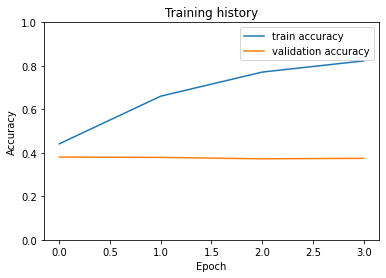

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  device,
  len(data_genres_concat[1])
)

test_acc

0.3955